<a href="https://colab.research.google.com/github/eviidoe/Bike-Share-Data-Analysis/blob/main/Capital_Bike_Share_EDA_February_2021ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


from google.colab import files
uploaded = files.upload()

Saving trips.csv to trips.csv


In [ ]:
trips = pd.read_csv("../content/trips.csv", index_col=0)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
trips

,rideable_type,started_at.1,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date,start_day,start_hour,start_weekday,tripdate
started_at,,,,,,,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,10.866667,2021-02-20,Saturday,14,weekend,2021-02-20
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,86.650000,2021-02-15,Monday,9,weekday,2021-02-15
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.366667,2021-02-15,Monday,9,weekday,2021-02-15
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,38.733333,2021-02-24,Wednesday,14,weekday,2021-02-24
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.050000,2021-02-05,Friday,16,weekday,2021-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 12:25:21,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,23.483333,2021-02-11,Thursday,12,weekday,2021-02-11
2021-02-09 12:39:15,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,26.066667,2021-02-09,Tuesday,12,weekday,2021-02-09
2021-02-09 12:39:24,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,25.650000,2021-02-09,Tuesday,12,weekday,2021-02-09


In [ ]:
trips.dtypes

rideable_type          object
started_at.1           object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
duration              float64
start_date             object
start_day              object
start_hour              int64
start_weekday          object
dtype: object

In [ ]:
trips = trips.astype({"started_at.1": "datetime64"})
trips = trips.astype({"ended_at": "datetime64"})
trips = trips.astype({"start_date": "datetime64"})


In [ ]:
corr = trips.corr()
corr.style.background_gradient(cmap='RdYlGn')


,start_lat,start_lng,end_lat,end_lng,duration,start_hour
start_lat,1.000000,-0.138619,0.826517,-0.126626,-0.005405,-0.022624
start_lng,-0.138619,1.000000,-0.119995,0.811040,-0.007024,-0.018000
end_lat,0.826517,-0.119995,1.000000,-0.131078,-0.004431,0.020107
end_lng,-0.126626,0.811040,-0.131078,1.000000,-0.005652,0.030141
duration,-0.005405,-0.007024,-0.004431,-0.005652,1.000000,-0.000424
start_hour,-0.022624,-0.018000,0.020107,0.030141,-0.000424,1.000000


In [ ]:
trips.describe()

,start_lat,start_lng,end_lat,end_lng,duration,start_hour
count,77503.000000,77503.000000,77399.000000,77399.000000,77505.000000,77505.000000
mean,38.907241,-77.031271,38.906165,-77.030887,19.603100,14.273634
std,0.026256,0.030574,0.026120,0.030347,155.737004,4.359021
min,38.782633,-77.368416,38.782633,-77.368416,-1.850000,0.000000
25%,38.895068,-77.044600,38.894972,-77.044600,6.300000,12.000000
50%,38.905697,-77.031880,38.905424,-77.031880,10.766667,15.000000
75%,38.918812,-77.015289,38.916936,-77.013500,18.600000,17.000000
max,39.123513,-76.825519,39.150000,-76.825535,21922.800000,23.000000


In [ ]:
trips['tripdate'] = trips['started_at.1'].map(lambda x: x.date())


In [ ]:
grp_date = trips.groupby('tripdate')

In [ ]:
trips_by_date = pd.DataFrame(grp_date.size(), columns=['num_trips'])


In [ ]:
mean_trips = trips_by_date['num_trips'].mean()
tot_tripdates = trips_by_date['num_trips'].count()
num_days = (trips_by_date.index.max() - trips_by_date.index.min()).days + 1

print("The mean number of trips per day is {:.2f}. The mean is based on {} tripdates."
      .format(mean_trips, tot_tripdates))
print("The beginning of the date range is {}.".format(trips_by_date.index.min()))
print("The end of the date range is {}.".format(trips_by_date.index.max()))
print("The are {} days in the date range.".format(num_days))

The mean number of trips per day is 2768.04. The mean is based on 28 tripdates.
The beginning of the date range is 2021-02-01.
The end of the date range is 2021-02-28.
The are 28 days in the date range.


In [ ]:
mean_trips/77505

0.03571428571428571

In [ ]:
grp_date_mem = trips[(trips.member_casual == 'member')].groupby(['tripdate'])


In [ ]:
trips_by_date_mem = pd.DataFrame(grp_date_mem.size(), columns=['num_trips'])


In [ ]:
mean_trips_mem = trips_by_date_mem['num_trips'].mean()
tot_tripdates_mem = trips_by_date_mem['num_trips'].count()
num_days_mem = (trips_by_date_mem.index.max() - trips_by_date_mem.index.min()).days + 1


<function print>

In [ ]:
mean_trips_mem

1917.642857142857

In [ ]:
mean_trips_mem/53694

0.03571428571428571

In [ ]:
grp_date_cas = trips[(trips.member_casual == 'casual')].groupby(['tripdate'])
trips_by_date_cas = pd.DataFrame(grp_date_cas.size(), columns=['num_trips'])
mean_trips_cas = trips_by_date_cas['num_trips'].mean()
tot_tripdates_cas = trips_by_date_cas['num_trips'].count()
num_days_cas = (trips_by_date_cas.index.max() - trips_by_date_cas.index.min()).days + 1


In [ ]:
mean_trips_cas/28

30.371173469387752

## Neuer Abschnitt

Ridership by Membertype

In [ ]:
trips['member_casual'].value_counts()

member    53694
casual    23811
Name: member_casual, dtype: int64

In [ ]:
trips['member_casual'].value_counts()[1]

23811

In [ ]:
trips['member_casual'].value_counts()[0]

53694

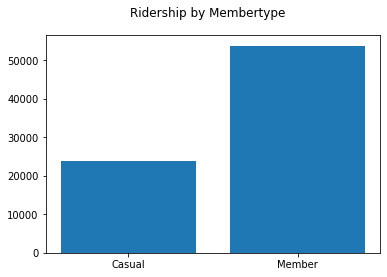

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1,1)
Ridership = ['Casual', 'Member']
values = [trips['member_casual'].value_counts()[1], trips['member_casual'].value_counts()[0]]
trips['member_casual'].value_counts()[0]
ax.bar(Ridership,values)
plt.suptitle('Ridership by Membertype')
plt.show()
plt.savefig("../content/Membertype.jpg")

In [ ]:
plt.savefig("Membertype")

<Figure size 432x288 with 0 Axes>

In [ ]:
data1 = trips['member_casual'].value_counts()
data1

member    53694
casual    23811
Name: member_casual, dtype: int64

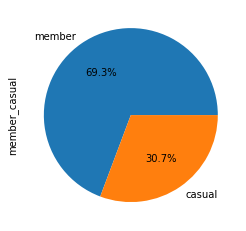

In [ ]:
data1.plot.pie(autopct="%.1f%%");

Ridership by Rideable Type

In [ ]:
trips['rideable_type'].value_counts()

classic_bike     52263
electric_bike    22481
docked_bike       2761
Name: rideable_type, dtype: int64

In [ ]:
trips['rideable_type'].value_counts()[0]

52263

In [ ]:
trips['rideable_type'].value_counts()[1]

22481

In [ ]:
trips['rideable_type'].value_counts()[2]

2761

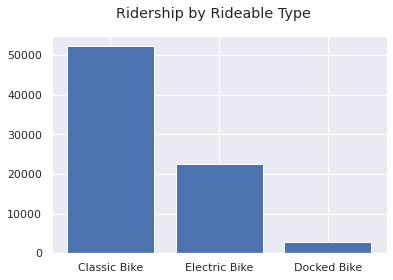

In [ ]:
fig, ax = plt.subplots(1,1)
Riderable_Type = ['Classic Bike', 'Electric Bike', 'Docked Bike']
values = [trips['rideable_type'].value_counts()[0], trips['rideable_type'].value_counts()[1], trips['rideable_type'].value_counts()[2]]
trips['rideable_type'].value_counts()[0]
ax.bar(Riderable_Type,values)
plt.suptitle('Ridership by Rideable Type')
plt.show()

In [ ]:
data2 = trips['rideable_type'].value_counts()

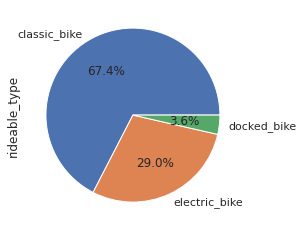

In [ ]:
data2.plot.pie(autopct="%.1f%%");

Ridership by Weekday

In [ ]:
trips['start_day'].value_counts()

Saturday     14021
Friday       13096
Wednesday    11969
Tuesday      11182
Thursday     10340
Sunday        8764
Monday        8133
Name: start_day, dtype: int64

In [ ]:
trips['start_day'].value_counts()[0]

14021

In [ ]:
trips['start_day'].value_counts()[1]

13096

In [ ]:
trips['start_day'].value_counts()[2]

11969

In [ ]:
trips['start_day'].value_counts()[3]

11182

In [ ]:
trips['start_day'].value_counts()[4]

10340

In [ ]:
trips['start_day'].value_counts()[5]

8764

In [ ]:
trips['start_day'].value_counts()[6]

8133

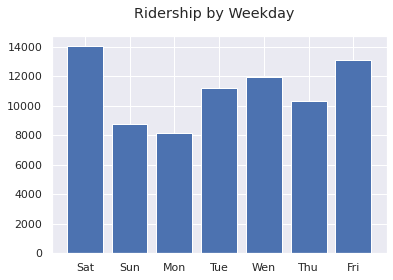

In [ ]:
fig, ax = plt.subplots(1,1)
Start_Day = ['Sat', 'Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri']
values = [trips['start_day'].value_counts()[0], trips['start_day'].value_counts()[5], trips['start_day'].value_counts()[6], trips['start_day'].value_counts()[3], trips['start_day'].value_counts()[2], trips['start_day'].value_counts()[4], trips['start_day'].value_counts()[1]]
trips['start_day'].value_counts()[0]
ax.bar(Start_Day,values)
plt.suptitle('Ridership by Weekday')
plt.show()

In [ ]:
data3 = trips['start_weekday'].value_counts()

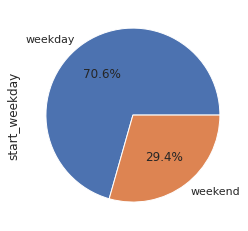

In [ ]:
data3.plot.pie(autopct="%.1f%%");

Distribution of Trip Duration

In [ ]:
trips['start_hour'].value_counts()

17    8428
16    7678
15    7114
18    6446
14    6088
13    5669
12    5268
19    4191
11    4109
8     3436
9     3210
10    3082
20    2749
7     2446
21    1863
22    1612
6     1243
23    1104
0      594
5      366
1      291
4      215
2      184
3      119
Name: start_hour, dtype: int64

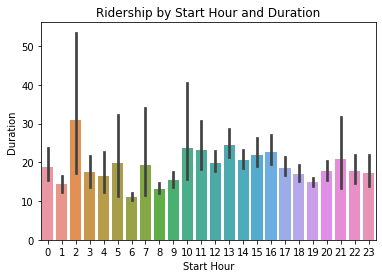

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=trips[['start_hour','duration']],
            x='start_hour',
            y='duration',
            ax=ax)

plt.title('Ridership by Start Hour and Duration')
plt.ylabel('Duration')
plt.xlabel('Start Hour')

#tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
#tick_lab=['0','1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
#plt.xticks(tick_val, tick_lab)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


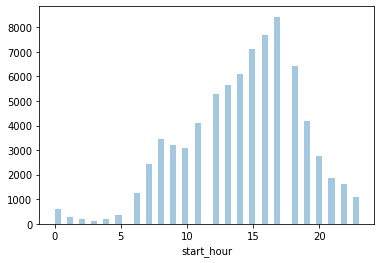

In [ ]:
sns.distplot( a=trips["start_hour"], hist=True, kde=False, rug=False )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


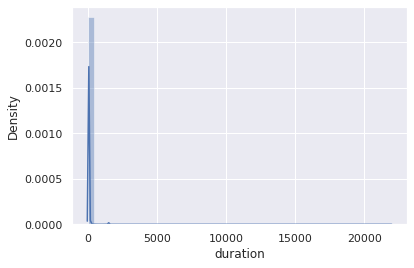

In [ ]:
sns.distplot(trips.duration);

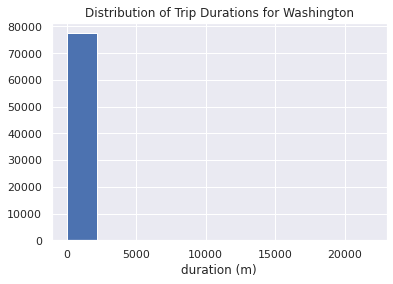

In [ ]:
plt.hist(trips.duration)
plt.title('Distribution of Trip Durations for Washington')
plt.xlabel('duration (m)')
plt.show()

In [ ]:
trips_dur_member = trips[trips['member_casual'] == 'member']['duration']
trips_dur_member

started_at
2021-02-15 09:54:23    86.650000
2021-02-15 09:53:12     0.366667
2021-02-24 14:50:17    38.733333
2021-02-05 16:39:10     0.050000
2021-02-09 16:20:45    17.800000
                         ...    
2021-02-09 08:36:35    12.383333
2021-02-23 11:59:36    10.950000
2021-02-11 12:25:21    23.483333
2021-02-09 12:39:15    26.066667
2021-02-04 14:42:32    14.816667
Name: duration, Length: 53694, dtype: float64

In [ ]:
trips_dur_casual = trips[trips['member_casual'] == 'casual']['duration']
trips_dur_casual

started_at
2021-02-20 14:03:25     10.866667
2021-02-27 12:36:18      9.200000
2021-02-27 15:36:05    111.583333
2021-02-09 12:36:34     20.033333
2021-02-16 16:16:05      6.050000
                          ...    
2021-02-04 18:06:09      9.466667
2021-02-21 16:43:08     39.583333
2021-02-26 11:58:42     20.566667
2021-02-09 12:39:24     25.650000
2021-02-09 14:59:11      9.533333
Name: duration, Length: 23811, dtype: float64

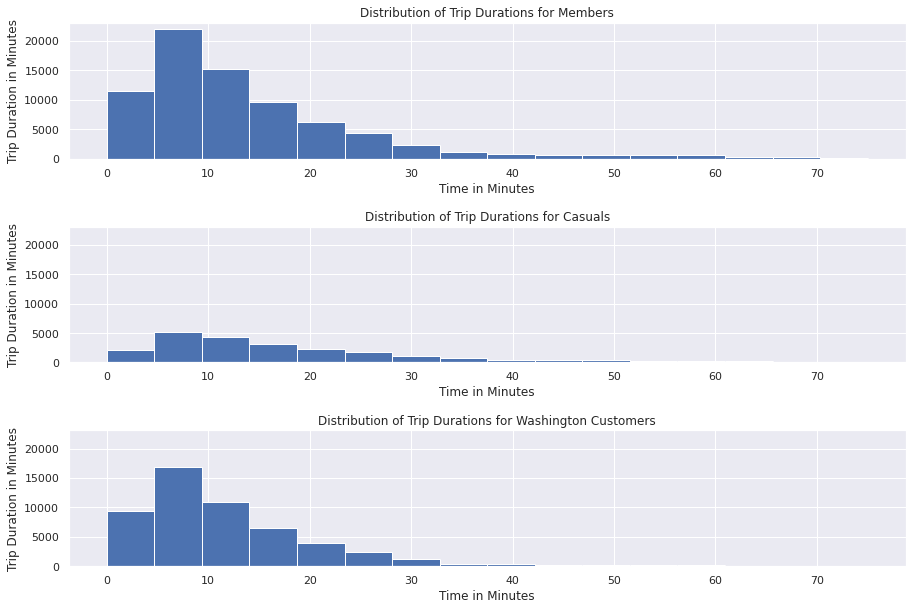

In [ ]:
f, (plt1, plt2, plt3) = plt.subplots(3, sharey=True)


plt1.hist(trips.duration, range = (0, 75), bins = 16)
plt1.set_title('Distribution of Trip Durations for Members')
plt1.set_xlabel('Time in Minutes')
plt1.set_ylabel("Trip Duration in Minutes")

plt2.hist(trips_dur_casual, range = (0, 75), bins = 16)
plt2.set_title('Distribution of Trip Durations for Casuals')
plt2.set_xlabel('Time in Minutes')
plt2.set_ylabel("Trip Duration in Minutes")

plt3.hist(trips_dur_member, range = (0, 75), bins = 16)
plt3.set_title('Distribution of Trip Durations for Washington Customers')
plt3.set_xlabel('Time in Minutes')
plt3.set_ylabel("Trip Duration in Minutes")

f.subplots_adjust(hspace=0.50)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()

Ridership by Weekday and Membertype

In [ ]:
trips_dm = trips[(trips['member_casual'] == 'member') & (trips['start_day'])]
trips_dm

,rideable_type,started_at.1,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date,start_day,start_hour,start_weekday
started_at,,,,,,,,,,,,,,,,,
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,86.650000,2021-02-15,Monday,9,weekday
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.366667,2021-02-15,Monday,9,weekday
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,38.733333,2021-02-24,Wednesday,14,weekday
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.050000,2021-02-05,Friday,16,weekday
2021-02-09 16:20:45,classic_bike,2021-02-09 16:20:45,2021-02-09 16:38:33,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,17.800000,2021-02-09,Tuesday,16,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09 08:36:35,classic_bike,2021-02-09 08:36:35,2021-02-09 08:48:58,5th St & Massachusetts Ave NW,31265,20th & E St NW,31204,38.900930,-77.018677,38.896300,-77.045000,member,12.383333,2021-02-09,Tuesday,8,weekday
2021-02-23 11:59:36,electric_bike,2021-02-23 11:59:36,2021-02-23 12:10:33,4th & M St SW,31108,20th & E St NW,31204,38.876694,-77.017831,38.896109,-77.044799,member,10.950000,2021-02-23,Tuesday,11,weekday
2021-02-11 12:25:21,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,23.483333,2021-02-11,Thursday,12,weekday


In [ ]:
trips_dm['start_day'].value_counts()

Friday       9114
Saturday     8710
Wednesday    8426
Tuesday      8201
Thursday     7404
Monday       5951
Sunday       5888
Name: start_day, dtype: int64

In [ ]:
trips_dm['start_day'].value_counts()[0]


9114

In [ ]:
trips_dm['start_day'].value_counts()[1]

8710

In [ ]:
trips_dm['start_day'].value_counts()[2]

8426

In [ ]:
trips_dm['start_day'].value_counts()[3]

8201

In [ ]:
trips_dm['start_day'].value_counts()[4]

7404

In [ ]:
trips_dm['start_day'].value_counts()[5]

5951

In [ ]:
trips_dm['start_day'].value_counts()[6]

5888

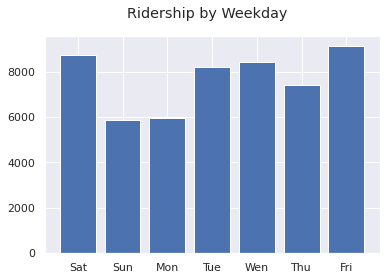

In [ ]:
f, (plt1, plt2) = plt.subplots(2, sharey=True)

Start_Day = ['Sat', 'Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri']
values = [trips_dm['start_day'].value_counts()[1], trips_dm['start_day'].value_counts()[6], trips_dm['start_day'].value_counts()[5], trips_dm['start_day'].value_counts()[3], trips_dm['start_day'].value_counts()[2], trips_dm['start_day'].value_counts()[4], trips_dm['start_day'].value_counts()[0]]
trips_dm['start_day'].value_counts()[0]
ax.bar(Start_Day,values)
plt.suptitle('Ridership by Weekday')





f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()

In [ ]:
trips_dc = trips[(trips['member_casual'] == 'casual') & (trips['start_day'])]
trips_dc

,rideable_type,started_at.1,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date,start_day,start_hour,start_weekday
started_at,,,,,,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,10.866667,2021-02-20,Saturday,14,weekend
2021-02-27 12:36:18,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,9.200000,2021-02-27,Saturday,12,weekend
2021-02-27 15:36:05,classic_bike,2021-02-27 15:36:05,2021-02-27 17:27:40,Lynn St & 19th St North,31014,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.897315,-77.070993,38.888774,-77.028694,casual,111.583333,2021-02-27,Saturday,15,weekend
2021-02-09 12:36:34,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014,23rd & E St NW,31260,38.897315,-77.070993,38.896104,-77.049882,casual,20.033333,2021-02-09,Tuesday,12,weekday
2021-02-16 16:16:05,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043,Royal St & Wilkes St,31903,38.810741,-77.044633,38.799267,-77.044700,casual,6.050000,2021-02-16,Tuesday,16,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-04 18:06:09,electric_bike,2021-02-04 18:06:09,2021-02-04 18:15:37,3rd & H St NE,31616,15th & East Capitol St NE,31630,38.900440,-77.001970,38.889954,-76.983506,casual,9.466667,2021-02-04,Thursday,18,weekday
2021-02-21 16:43:08,classic_bike,2021-02-21 16:43:08,2021-02-21 17:22:43,3rd & H St NE,31616,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.900412,-77.001949,38.888774,-77.028694,casual,39.583333,2021-02-21,Sunday,16,weekend
2021-02-26 11:58:42,docked_bike,2021-02-26 11:58:42,2021-02-26 12:19:16,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,casual,20.566667,2021-02-26,Friday,11,weekday


In [ ]:
trips_dc['start_day'].value_counts()

Saturday     5311
Friday       3982
Wednesday    3543
Tuesday      2981
Thursday     2936
Sunday       2876
Monday       2182
Name: start_day, dtype: int64

In [ ]:
trips_dc['start_day'].value_counts()[0]

5311

In [ ]:
trips_dc['start_day'].value_counts()[1]

3982

In [ ]:
trips_dc['start_day'].value_counts()[2]

3543

In [ ]:
trips_dc['start_day'].value_counts()[3]

2981

In [ ]:
trips_dc['start_day'].value_counts()[4]

2936

In [ ]:
trips_dc['start_day'].value_counts()[5]

2876

In [ ]:
trips_dc['start_day'].value_counts()[6]

2182

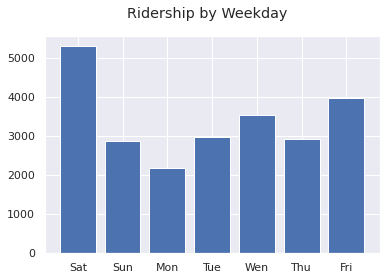

In [ ]:
fig, ax = plt.subplots(1,1)
Start_Day = ['Sat', 'Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri']
values = [trips_dc['start_day'].value_counts()[0], trips_dc['start_day'].value_counts()[5], trips_dc['start_day'].value_counts()[6], trips_dc['start_day'].value_counts()[3], trips_dc['start_day'].value_counts()[2], trips_dc['start_day'].value_counts()[4], trips_dc['start_day'].value_counts()[1]]
trips_dc['start_day'].value_counts()[0]
ax.bar(Start_Day,values)
plt.suptitle('Ridership by Weekday')
f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()

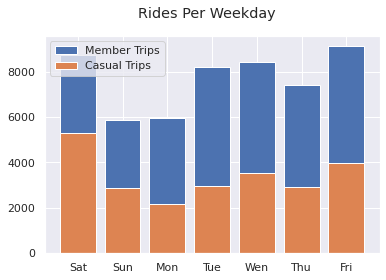

In [ ]:
fig, ax = plt.subplots(1,1)
Start_Day = ['Sat', 'Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri']
values = [trips_dm['start_day'].value_counts()[1], trips_dm['start_day'].value_counts()[6], trips_dm['start_day'].value_counts()[5], trips_dm['start_day'].value_counts()[3], trips_dm['start_day'].value_counts()[2], trips_dm['start_day'].value_counts()[4], trips_dm['start_day'].value_counts()[0]]
trips_dm['start_day'].value_counts()[0]
ax.bar(Start_Day,values)

Start_Day = ['Sat', 'Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri']
values = [trips_dc['start_day'].value_counts()[0], trips_dc['start_day'].value_counts()[5], trips_dc['start_day'].value_counts()[6], trips_dc['start_day'].value_counts()[3], trips_dc['start_day'].value_counts()[2], trips_dc['start_day'].value_counts()[4], trips_dc['start_day'].value_counts()[1]]
trips_dc['start_day'].value_counts()[0]
ax.bar(Start_Day,values)

plt.legend(('Member Trips','Casual Trips'))
plt.suptitle('Rides Per Weekday')


f.subplots_adjust(hspace=0.50)
f.set_figheight(15)
f.set_figwidth(20)
plt.show()

Popular Stations

In [ ]:
trips["end_station_name"].value_counts(ascending=False)[0:10]

New Hampshire Ave & T St NW    976
15th & P St NW                 960
1st & M St NE                  775
14th & V St NW                 765
17th & Corcoran St NW          682
8th & O St NW                  662
5th & K St NW                  638
14th & R St NW                 611
11th & M St NW                 602
3rd & M St NE                  585
Name: end_station_name, dtype: int64

In [ ]:
trips["end_station_name"].value_counts(ascending=True)[0:20]


Greensboro & International Dr                          1
Wiehle Ave & Reston Station Blvd                       1
Montgomery College / W Campus Dr & Mannakee St         1
Kenilworth Terrace & Hayes St. NE                      1
Southern Ave Metro                                     1
Castle Blvd & Castle Ln                                1
Jones Branch & Westbranch Dr                           1
North Shore Dr & Village Rd                            1
White Oak Rec Center                                   1
Blueridge Ave & Elkin St                               1
Amherst Ave & Prichard Rd                              1
Nannie Helen Burroughs Ave & 49th St NE                1
Windham Ln & Amherst Ave                               1
37th & Ely Pl SE                                       1
N Hampton Dr & Ford Ave                                1
Hyattsville Library / Adelphi Rd & Toledo Rd           1
Alabama Ave & Stanton Rd SE / Shops at Park Village    1
Westpark & Jones Branch Dr     

In [ ]:
trips["start_station_name"].value_counts(ascending=True)[0:20]


Westpark & Jones Branch Dr                        1
Fallsgrove Dr & W Montgomery Ave                  1
Library St & Freedom Dr                           1
19th & Savannah St SE                             1
Congress Heights Metro                            1
United Medical Center                             1
Towers Crescent Dr & Tysons One Pl                1
Shady Grove Hospital                              1
White Oak Rec Center                              1
The Shoppes @ Burnt Mills                         1
White Oak Transit Center                          1
Tysons West Transit Center                        1
Alabama & MLK Ave SE                              1
Montgomery College / W Campus Dr & Mannakee St    1
Westpark & Park Run Dr                            1
McLean Metro                                      1
Nannie Helen Burroughs & Minnesota Ave NE         1
Town Center Pkwy & Sunset Hills Rd                1
Piccard & W Gude Dr                               1
Wiehle Ave &

In [ ]:
trip_mem = trips[(trips["member_casual"] == "member")]

In [ ]:
trip_cas = trips[(trips["member_casual"] == "casual")]

In [ ]:
trip_mem_start = trip_mem["start_station_name"].value_counts()[0:20]
trip_mem_start 

New Hampshire Ave & T St NW                            817
15th & P St NW                                         709
11th & M St NW                                         557
14th & Irving St NW                                    552
14th & V St NW                                         510
17th & Corcoran St NW                                  509
8th & O St NW                                          503
5th & K St NW                                          485
Thomas Circle                                          478
15th & W St NW                                         438
20th St & Florida Ave NW                               428
1st & M St NE                                          417
14th & Rhode Island Ave NW                             415
4th & M St SW                                          410
23rd & M St NW                                         408
Eastern Market Metro / Pennsylvania Ave & 8th St SE    394
3rd & M St NE                                          3

In [ ]:
trip_mem_end = trip_mem["end_station_name"].value_counts() [0:20]
trip_mem_end

New Hampshire Ave & T St NW                            816
15th & P St NW                                         769
14th & V St NW                                         599
17th & Corcoran St NW                                  574
5th & K St NW                                          534
1st & M St NE                                          490
11th & M St NW                                         485
8th & O St NW                                          476
23rd & M St NW                                         466
20th St & Florida Ave NW                               461
14th & Irving St NW                                    443
14th & R St NW                                         434
Massachusetts Ave & Dupont Circle NW                   428
Eastern Market Metro / Pennsylvania Ave & 8th St SE    427
3rd & M St NE                                          424
14th & Rhode Island Ave NW                             419
15th & W St NW                                         4

In [ ]:
trip_cas_start = trip_cas["start_station_name"].value_counts() [0:20]
trip_cas_start

Lincoln Memorial                                         367
Henry Bacon Dr & Lincoln Memorial Circle NW              297
1st & M St NE                                            250
4th St & Madison Dr NW                                   241
14th & Irving St NW                                      224
Jefferson Dr & 14th St SW                                221
Smithsonian-National Mall / Jefferson Dr & 12th St SW    206
New Hampshire Ave & T St NW                              187
8th & O St NW                                            181
11th & M St NW                                           168
15th & P St NW                                           167
Lamont & Mt Pleasant NW                                  166
15th & W St NW                                           159
17th St & Independence Ave SW                            158
14th & V St NW                                           152
3rd & M St NE                                            146
Ohio Dr & West Basin Dr 

In [ ]:
trip_cas_end = trip_cas["end_station_name"].value_counts() [0:20]
trip_cas_end

Lincoln Memorial                                         300
1st & M St NE                                            285
Henry Bacon Dr & Lincoln Memorial Circle NW              272
Jefferson Dr & 14th St SW                                227
4th St & Madison Dr NW                                   217
15th & P St NW                                           191
8th & O St NW                                            186
Smithsonian-National Mall / Jefferson Dr & 12th St SW    180
14th & R St NW                                           177
15th St & Constitution Ave NW                            173
14th & V St NW                                           166
3rd & M St NE                                            161
New Hampshire Ave & T St NW                              160
15th & W St NW                                           154
1st & K St SE                                            148
M St & Pennsylvania Ave NW                               144
Massachusetts Ave & Dupo

In [ ]:
count_end1 = pd.DataFrame(trips[['member_casual', 'end_station_name']].groupby(['member_casual'])['end_station_name'].value_counts(ascending=False))
count_end1

end_station_name
member_casual end_station_name                                             
casual        Lincoln Memorial                                          300
              1st & M St NE                                             285
              Henry Bacon Dr & Lincoln Memorial Circle NW               272
              Jefferson Dr & 14th St SW                                 227
              4th St & Madison Dr NW                                    217
...                                                                     ...
member        South Capitol & Atlantic St SW                              1
              Southern Ave Metro                                          1
              State Theatre / Park Pl & N Washington St                   1
              Vy Reston Heights                                           1
              Westpark Dr & Leesburg Pike                                 1

[1131 rows x 1 columns]